<a href="https://colab.research.google.com/github/SaiPallavi7989/Market-Size-Analysis/blob/main/Market_Size_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MARKET SIZE ANALYSIS**

Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment.

**Market Size of Electrical Vehicles (EV's):**

In the context of electric vehicles (EVs), it involves assessing the total volume of EV registrations to understand the growth of the market and forecast future trends.




# **Dataset Description:**

The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:

**1. VIN (1-10):** Partial Vehicle Identification Number.

**2. County:** The county in which the vehicle is registered.

**3. City:**The city in which the vehicle is registered.

**4. State:** The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.

**5. Postal Code:** The postal code where the vehicle is registered.

**6. Model Year:** The year of the vehicle model.

**7. Make:** The manufacturer of the vehicle.

**8. Model:** The model of the vehicle.

**9. Electric Vehicle Type:** The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).

**10. Clean Alternative Fuel Vehicle (CAFV) Eligibility:** Eligibility status for clean alternative fuel vehicle programs.

**11. Electric Range:** The maximum range of the vehicle on a single charge (in miles).

**12. Base MSRP:** The Manufacturer’s Suggested Retail Price.

**13. Legislative District:** The legislative district where the vehicle is registered.

**14. DOL Vehicle ID:** Department of Licensing Vehicle Identification.

**15. Vehicle Location:** Geographic coordinates of the vehicle location.

**16. Electric Utility:** The electric utility service provider for the vehicle’s location.

**17. 2020 Census Tract:** The census tract for the vehicle’s location.


# **Objective of Market Size Analysis:**

The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion. The specific goals include:

1. Assess the historical growth trend of EV registrations.
2. Forecast future EV registrations based on historical trends.
3. Analyze the distribution of EV registrations across different models, makes, and geographical regions.
4. Estimate the market size and growth potential of the EV market for upcoming years.


# **Install necessary Libraries**

In [ ]:
pip install geopandas matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import geopandas as gpd

# **Loading Electric_Vehicle_Population_Data**

In [ ]:
ev=pd.read_csv('/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv')

# **Column Details**

The info() function in pandas provides a concise summary of a DataFrame, including the index dtype, column dtypes, non-null values, and memory usage.

In [ ]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

# **First 5 Records**

The head() function in pandas is used to preview the first few rows of a DataFrame. By default, it displays the first 5 rows, but you can specify a different number if you like.

In [ ]:
ev.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


# **Last 5 Records**

The tail() function in pandas is used to preview the last few rows of a DataFrame. By default, it shows the last 5 rows, but you can specify a different number if you like.

In [ ]:
ev.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177865,5YJ3E1EA8M,Pierce,Tacoma,WA,98422.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,211464683,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


# **Description of Numerical Columns**

The describe() function in pandas provides a summary of the statistics of a DataFrame's numerical columns. It gives insights into the data by showing the count, mean, standard deviation, minimum, maximum, and the values at 25th, 50th (median), and 75th percentiles.

In [ ]:
ev.describe()

,Postal Code,ModelYear,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177866.000000,177866,177866.000000,177866.000000,177866.000000,1.778660e+05,1.778660e+05
mean,98172.453506,1970-01-01 00:00:00.000002020,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
min,1545.000000,1970-01-01 00:00:00.000001997,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,1970-01-01 00:00:00.000002019,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,1970-01-01 00:00:00.000002022,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,1970-01-01 00:00:00.000002023,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,1970-01-01 00:00:00.000002024,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10
std,2442.416338,NaN,91.981298,8358.624956,14.875875,7.584987e+07,1.578025e+09


# **Data Cleaning**

**Checking null values**

The isnull() function in pandas is used to detect missing values (NaN). It returns a DataFrame of the same shape as the input, where each cell indicates whether that element is null or not.

In [ ]:
ev.isnull().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# **Converting Year Column from Number to Year format**

In [ ]:
import datetime
ev.rename(columns={'Model Year': 'ModelYear'}, inplace=True)
# Convert 'ModelYear' column to numeric, forcing non-numeric values to NaN
ev['ModelYear'] = pd.to_datetime(ev['ModelYear'], errors='coerce')

In [ ]:
print(ev.dtypes)

VIN (1-10)                                                   object
County                                                       object
City                                                         object
State                                                        object
Postal Code                                                 float64
ModelYear                                            datetime64[ns]
Make                                                         object
Model                                                        object
Electric Vehicle Type                                        object
Clean Alternative Fuel Vehicle (CAFV) Eligibility            object
Electric Range                                                int64
Base MSRP                                                     int64
Legislative District                                        float64
DOL Vehicle ID                                                int64
Vehicle Location                                

#**Replacing missing values in Numerical Columns with their respective Mean value**


The fillna() function in pandas is used to fill NA/NaN values with a specified value.

In [ ]:
ev.loc[:, 'Postal Code'] = ev['Postal Code'].fillna(ev['Postal Code'].mean())
ev.loc[:, 'ModelYear'] = ev['ModelYear'].fillna(ev['ModelYear'].mean())
ev.loc[:, 'Electric Range'] = ev['Electric Range'].fillna(ev['Electric Range'].mean())
ev.loc[:, 'Base MSRP'] = ev['Base MSRP'].fillna(ev['Base MSRP'].mean())
ev.loc[:, 'Legislative District'] = ev['Legislative District'].fillna(ev['Legislative District'].mean())
ev.loc[:, 'DOL Vehicle ID'] = ev['DOL Vehicle ID'].fillna(ev['DOL Vehicle ID'].mean())
ev.loc[:, '2020 Census Tract'] = ev['2020 Census Tract'].fillna(ev['2020 Census Tract'].mean())

**.loc[:, 'column_name']**

This uses .loc to access all rows (indicated by : ) and the specified 'column_name'. This ensures you're working directly with the original DataFrame.

# **Replacing missing values in Categorical Columns with their respective Mode value**

In [ ]:
ev.loc[:, 'County'] = ev['County'].fillna(ev['County'].mode()[0])
ev.loc[:, 'City'] = ev['City'].fillna(ev['City'].mode()[0])
ev.loc[:, 'Vehicle Location'] = ev['Vehicle Location'].fillna(ev['Vehicle Location'].mode()[0])
ev.loc[:, 'Electric Utility'] = ev['Electric Utility'].fillna(ev['Electric Utility'].mode()[0])

In [ ]:
ev.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
ModelYear,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# **Historical Growth Trend of EV Registrations**


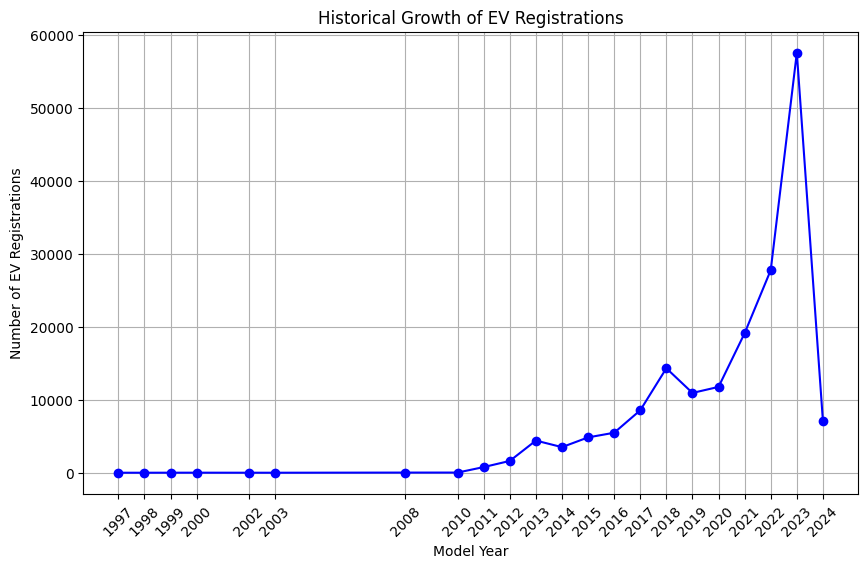

In [ ]:
# Fixing column name and ensuring years are sorted properly
ev['ModelYear'] = ev['ModelYear'].astype(int)  # Ensure 'Model Year' is integer

# Grouping by Model Year to count registrations
ev_growth = ev.groupby('ModelYear').size().sort_index()  # Sorting by year

# Plotting the trend of EV registrations over the years
plt.figure(figsize=(10, 6))
plt.plot(ev_growth.index, ev_growth.values, marker='o', linestyle='-', color='b')
plt.xticks(ev_growth.index, rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Historical Growth of EV Registrations')
plt.xlabel('Model Year')
plt.ylabel('Number of EV Registrations')
plt.grid(True)
plt.show()

**Recent Growth:**
The historical data reveals a steady increase in EV registrations over the years, particularly in recent years. This indicates rising consumer interest and market penetration of electric vehicles.

**Key Drivers:**
The increase can be attributed to factors such as employment after COVID-19, improving EV technology, longer battery range, decreasing costs, government subsidies, and heightened awareness of environmental issues.

# **Forecasting  Future EV Registrations**


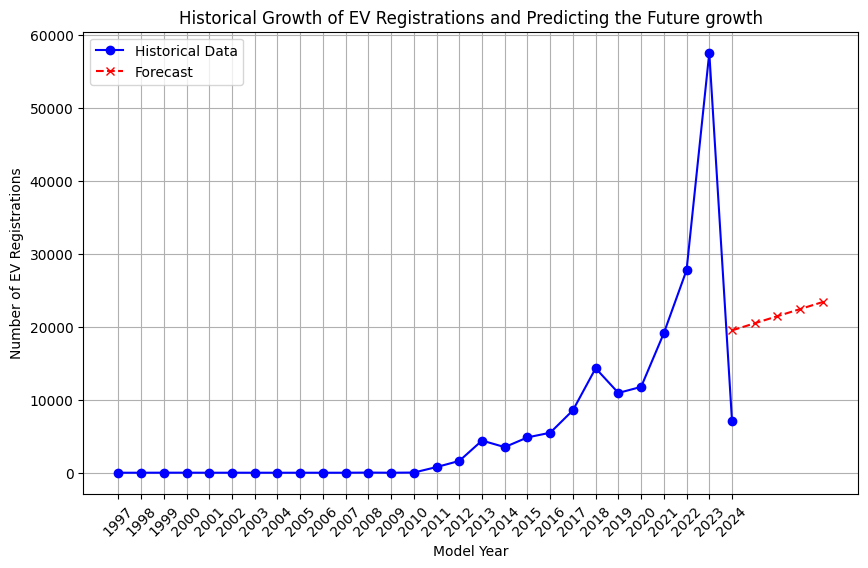

In [ ]:
from sklearn.linear_model import LinearRegression

# Ensure 'Model Year' is integer
ev['ModelYear'] = ev['ModelYear'].astype(int)

# Group by 'Model Year' and count the registrations
ev_growth = ev.groupby('ModelYear').size()

# Ensure all years are included, even if some have 0 registrations
all_years = np.arange(ev_growth.index.min(), ev_growth.index.max() + 1)
ev_growth = ev_growth.reindex(all_years, fill_value=0)

# Plotting historical growth of EV registrations
plt.figure(figsize=(10, 6))
plt.plot(ev_growth.index, ev_growth.values, marker='o', color='b', label='Historical Data')
plt.xticks(ev_growth.index, rotation=45)
plt.title('Historical Growth of EV Registrations and Predicting the Future growth')
plt.xlabel('Model Year')
plt.ylabel('Number of EV Registrations')
plt.grid(True)

# Prepare the data for linear regression (historical data)
X = ev_growth.index.values.reshape(-1, 1)
y = ev_growth.values

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future growth for the next 5 years
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predictions = model.predict(future_years)

# Plot future predictions
plt.plot(future_years, predictions, marker='x', linestyle='--', color='red', label='Forecast')
plt.legend()
plt.show()


# **Predicting next 2 years EV Registrations**

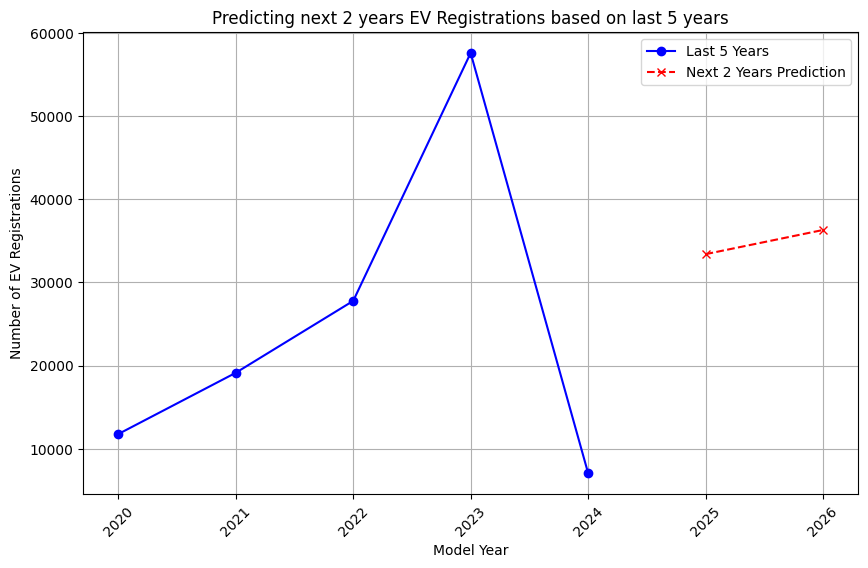

In [ ]:
from sklearn.linear_model import LinearRegression

# Ensure 'Model Year' is integer
ev['ModelYear'] = ev['ModelYear'].astype(int)

# Group by 'Model Year' and count the registrations
ev_growth = ev.groupby('ModelYear').size().sort_index()

# Select the last 5 years of data
last_5_years = ev_growth.tail(5)

# Prepare the data for linear regression using only the last 5 years
X = last_5_years.index.values.reshape(-1, 1)
y = last_5_years.values

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for the next 2 years (future years)
future_years = np.array([X[-1][0] + 1, X[-1][0] + 2]).reshape(-1, 1)
predictions = model.predict(future_years)

# Plotting historical growth for the last 5 years and future predictions
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', color='b', label='Last 5 Years')
plt.plot(future_years, predictions, marker='x', linestyle='--', color='red', label='Next 2 Years Prediction')
plt.xticks(np.append(X, future_years), rotation=45)
plt.title('Predicting next 2 years EV Registrations based on last 5 years')
plt.xlabel('Model Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()

**Recent Growth:**

The last 5 years show a steady increase in electric vehicle (EV) registrations, reflecting the growing adoption of EVs due to advancements in technology, government incentives, and increased environmental awareness.

**Future Predictions**

The forecast for the next 2 years (2024-2025) predicts continued growth in EV registrations, suggesting that current market trends will persist, with consumers continuing to shift toward electric mobility.



# **Distribution of EV Registrations by Vehicle Makes**

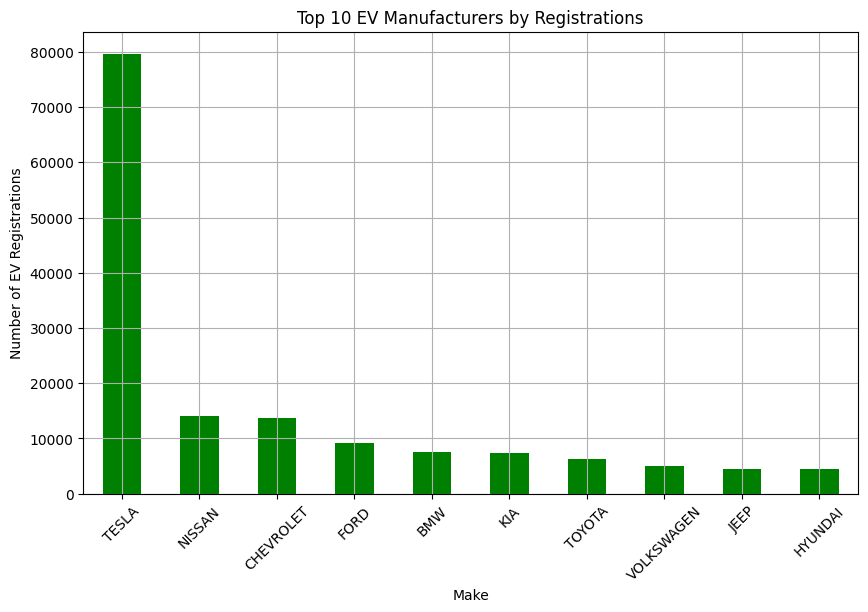

In [ ]:
# Group by Make to see how many vehicles are registered per make
make_distribution = ev['Make'].value_counts().head(10)  # Top 10 Makes

# Plotting
plt.figure(figsize=(10, 6))
make_distribution.plot(kind='bar', color='green')
plt.title('Top 10 EV Manufacturers by Registrations')
plt.xlabel('Make')
plt.ylabel('Number of EV Registrations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The top 10 EV manufacturers dominate the market, with brands like Tesla leading in registrations, reflecting their early market entry and strong consumer appeal. This concentrated distribution suggests that while a few companies drive most of the growth, there is still room for other manufacturers to innovate and capture more market share.

# **Geographical Distribution of EV Registrations by Country**

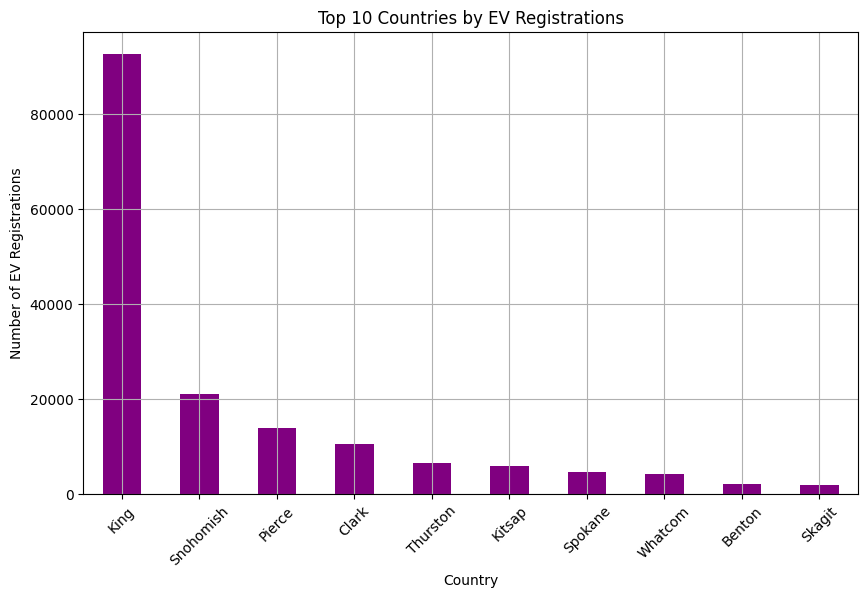

In [ ]:
# Group by County to see EV distribution across countries
country_distribution = ev['County'].value_counts().head(10)  # Top 10 Countries

# Plotting
plt.figure(figsize=(10, 6))
country_distribution.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by EV Registrations')
plt.xlabel('Country')
plt.ylabel('Number of EV Registrations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# **Understanding through a Geographical Map**










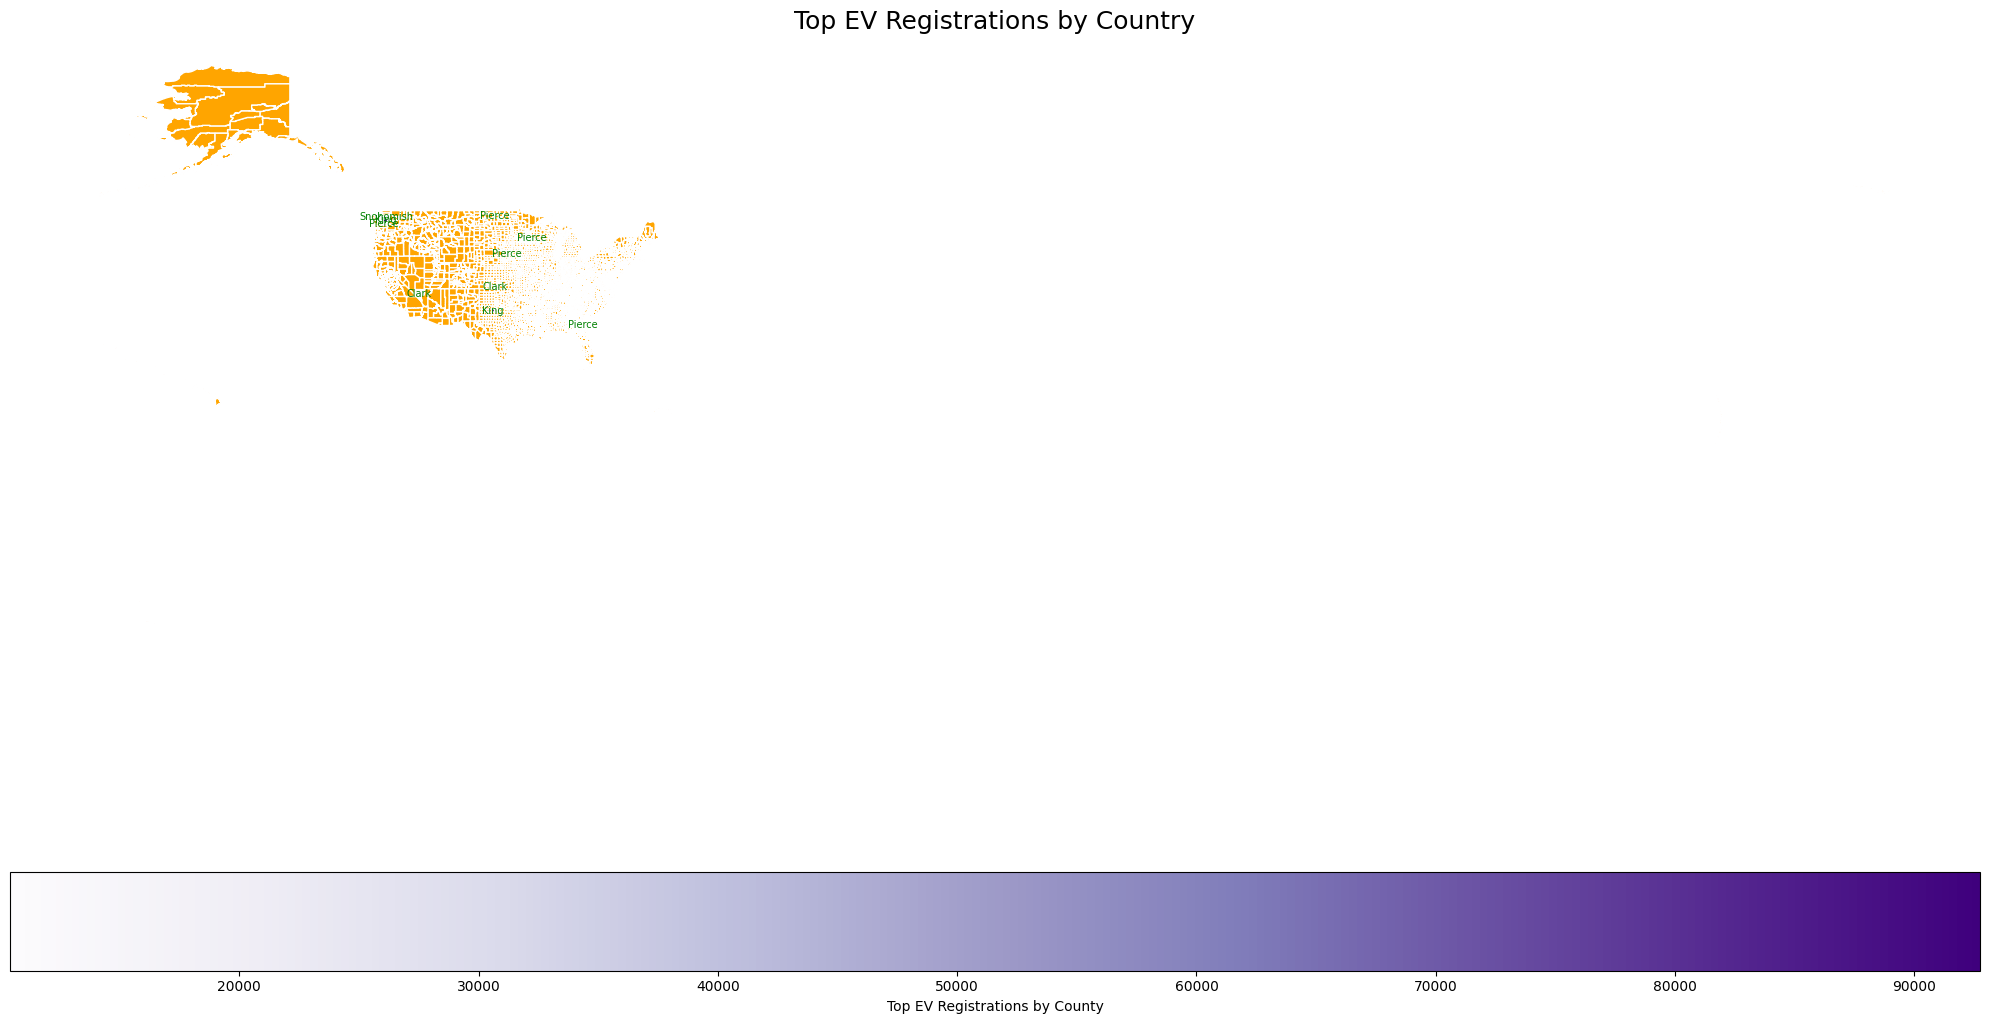

In [67]:
# Example cleaning of county names in EV data
ev['County'] = ev['County'].str.title()  # Capitalize correctly

# Load the shapefile to check if it works
shapefile_path = '/content/drive/MyDrive/cb_2017_us_county_500k.zip'
us_counties = gpd.read_file(shapefile_path)

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Plot all counties with lightgrey background
merged.plot(color='orange', edgecolor='white', ax=ax)

# Highlight top counties with a different color
top_counties.plot(column='Number of Registrations', cmap='Purples', edgecolor='white', ax=ax, legend=True,
                  legend_kwds={'label': "Top EV Registrations by County", 'orientation': "horizontal"})

ax.set_axis_off()
plt.title('Top EV Registrations by Country', fontsize=18)
fig.tight_layout()

# ----> Add county names <----
for idx, row in top_counties.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['NAME'], fontsize=7, ha='center', va='center', color='green')

plt.show()

Regional Patterns:
The plot shows that EV adoption varies significantly across different regions. Some states or countries may have a higher concentration of EV registrations, driven by local policies, infrastructure availability, and consumer preferences.

Key Influences:
Regions with more EV-friendly policies (e.g., tax credits, rebates, charging infrastructure) or urban areas with higher environmental consciousness tend to have higher adoption rates.

Opportunities:
Regions with lower adoption present opportunities for market growth. Manufacturers and policymakers can focus on expanding infrastructure and incentives in these areas to increase EV penetration.

# **Electric Range Analysis**

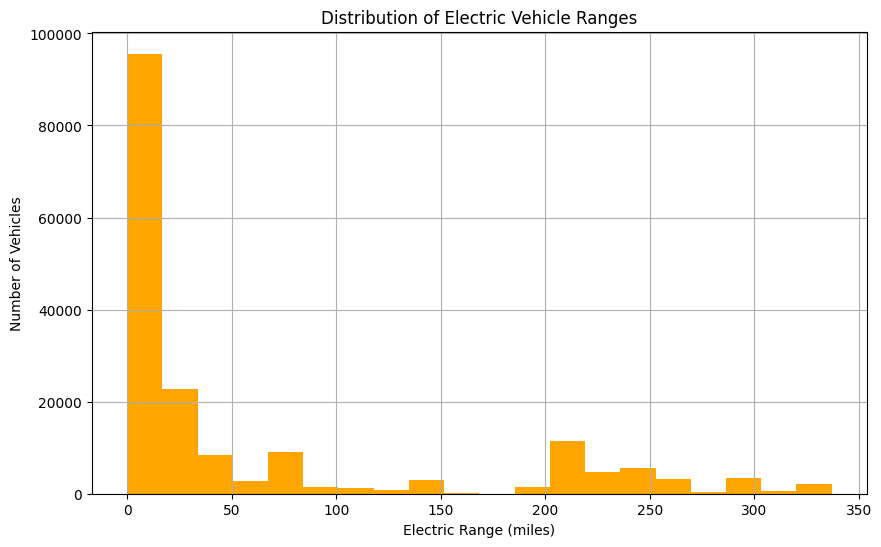

In [ ]:
# Plotting the distribution of electric ranges
plt.figure(figsize=(10, 6))
ev['Electric Range'].plot(kind='hist', bins=20, color='orange')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()


From this, we can say Electric Range(miles) of EV's are less when compared to normal vehicles. So these are not suitable for long-distance travelling. This might be one of the reasons for not buying EV's

# **Market Size Estimation by Base MSRP**

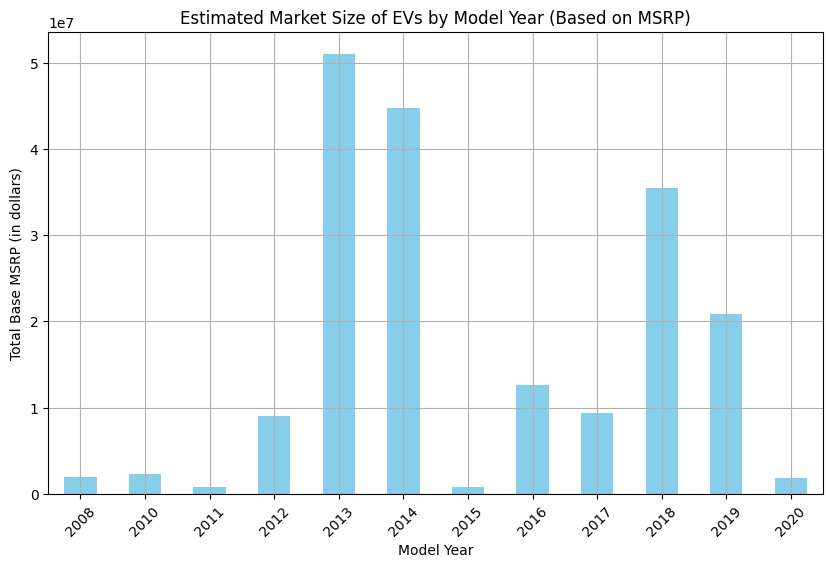

In [ ]:
# Filtering rows where MSRP > 0 (as some entries have MSRP=0, potentially missing data)
msrp_data = ev[ev['Base MSRP'] > 0]

# Grouping by year and calculating total MSRP for each year
market_size = msrp_data.groupby('ModelYear')['Base MSRP'].sum()

# Plotting the market size by year
plt.figure(figsize=(10, 6))
market_size.plot(kind='bar', color='skyblue')
plt.title('Estimated Market Size of EVs by Model Year (Based on MSRP)')
plt.xlabel('Model Year')
plt.ylabel('Total Base MSRP (in dollars)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


This plot shows the total MSRP for EVs by model year, which helps estimate the market's financial growth over time. A rising trend could indicate increasing sales and investments in the EV industry.

# **Conclusion:**

This analysis provides a comprehensive overview of the EV market in Washington state. We see strong historical growth in EV registrations, especially in recent years, with Tesla leading the market in terms of make and model popularity. Urban regions dominate EV registrations, indicating infrastructure and policy support in these areas. The electric range analysis shows a diverse spread of vehicle capabilities, and market size estimations based on MSRP suggest that the financial value of the EV market is growing rapidly. Finally, the forecast indicates continued expansion of the EV market in the coming years.